In [11]:
cd c:\Users\seand\OneDrive\Dokumente\Masterthesis\CL_PDE_Solv

c:\Users\seand\OneDrive\Dokumente\Masterthesis\CL_PDE_Solv


In [12]:
from Problems.oneDim_Problems.sintsin2tproblem import clustering, f, exact_sol, clustering_grid
from models_code.SubproblemNetworks.LocalDeepONet_oneDim import LocalDeepONet_oneDim
from models_code.lossfunc import *
import numpy as np
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm
from pathlib import Path

from src.config import *

# Plots of Problem defining functions

<function matplotlib.pyplot.show(close=None, block=None)>

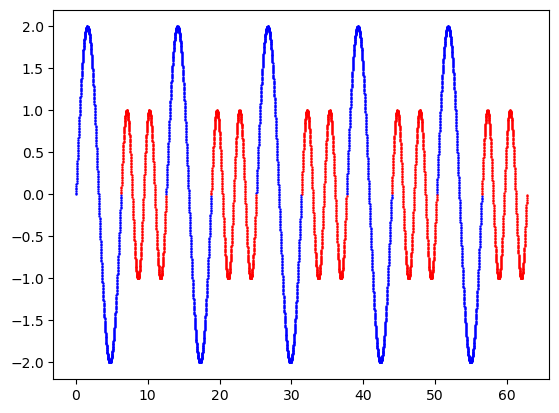

In [3]:
#plot f in [0,20 pi]
grid_x = torch.arange(0,20* np.pi,0.01)
out_f = np.array([f(t).numpy() for t in grid_x])
clusterlabel = clustering_grid(grid_x)[:,0]
plt.scatter(grid_x.numpy()[clusterlabel == 0] , out_f[clusterlabel == 0], color = 'blue', s = 0.5)
plt.scatter(grid_x.numpy()[clusterlabel == 1] , out_f[clusterlabel == 1], color = 'red', s = 0.5)
#plt.plot(grid_x.numpy() , out_f)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

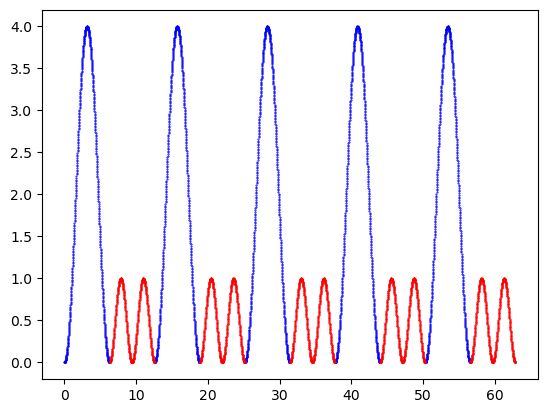

In [4]:
#plot exact solution in [0,20 pi]
grid_x = torch.arange(0,20* np.pi,0.01)
out_exact_sol = np.array([exact_sol(t).numpy() for t in grid_x])
clusterlabel = clustering_grid(grid_x)[:,0]
plt.scatter(grid_x.numpy()[clusterlabel == 0] , out_exact_sol[clusterlabel == 0], color = 'blue', s = 0.2)
plt.scatter(grid_x.numpy()[clusterlabel == 1] , out_exact_sol[clusterlabel == 1], color = 'red', s = 0.2)
plt.show

# Training Loops Local Solutions

In [14]:
#load local model A
sol_cluster_A = torch.load(Path(trained_models_address , 'local_A0.pt'))
sol_cluster_A.eval()

LocalDeepONet_oneDim(
  (in_trunk): Sequential(
    (0): Linear(in_features=1, out_features=20, bias=True)
    (1): Tanh()
  )
  (hid_trunk): Sequential(
    (0): Sequential(
      (0): Linear(in_features=20, out_features=20, bias=True)
      (1): Tanh()
    )
    (1): Sequential(
      (0): Linear(in_features=20, out_features=20, bias=True)
      (1): Tanh()
    )
    (2): Sequential(
      (0): Linear(in_features=20, out_features=20, bias=True)
      (1): Tanh()
    )
    (3): Sequential(
      (0): Linear(in_features=20, out_features=20, bias=True)
      (1): Tanh()
    )
    (4): Sequential(
      (0): Linear(in_features=20, out_features=20, bias=True)
      (1): Tanh()
    )
    (5): Sequential(
      (0): Linear(in_features=20, out_features=20, bias=True)
      (1): Tanh()
    )
    (6): Sequential(
      (0): Linear(in_features=20, out_features=20, bias=True)
      (1): Tanh()
    )
    (7): Sequential(
      (0): Linear(in_features=20, out_features=20, bias=True)
      (1): Tan

In [8]:
#define Trainingset on A:
num_train_boundary = 15
t_grid = torch.linspace(0.,2*torch.pi,4000,requires_grad = True).view(-1,1).to('cuda')
boundary_t = torch.tensor(0., requires_grad = True).view(-1,1).to('cuda')
boundary_values = torch.linspace(-1.5,1.5,num_train_boundary, requires_grad = True).to('cuda')
#output on grid:
f_out = torch.zeros(t_grid.shape[0]).to('cuda')
for i in range(t_grid.shape[0]):
  f_out[i] = f(t_grid[i])

#model:
#






sol_cluster_A = LocalDeepONet_oneDim(1, 20, 10)
sol_cluster_A = sol_cluster_A.to('cuda')
alpha = 1e-3
beta = 0#1e-2
optimizer = torch.optim.Adam(sol_cluster_A.parameters(), lr = 1e-3)


for i in range(2000):
  optimizer.zero_grad()
  boundary_value_epoch = torch.full( t_grid.shape , boundary_values[i%num_train_boundary].item() , requires_grad = True).to('cuda')

  loss = D_loc(sol_cluster_A , boundary_t, boundary_value_epoch  , t_grid, f_out , alpha, beta )

  print(loss.item())
  loss.backward(retain_graph=True)
  optimizer.step()



0.009061181917786598
0.001992657780647278
0.0011214609257876873
0.003353958483785391
0.003943577408790588
0.002798903500661254
0.0014442194951698184
0.0008055754005908966
0.000987280043773353
0.0015499899163842201
0.001967327669262886
0.0019776152912527323
0.001636799774132669
0.0011760805500671268
0.0008361060754396021
0.0007495852187275887
0.0008916641818359494
0.001113243866711855
0.0012450575595721602
0.0012040354777127504
0.0010262576397508383
0.0008193625253625214
0.0006854916573502123
0.0006658961647190154
0.0007304383325390518
0.0008077100501395762
0.0008320708875544369
0.0007788216462358832
0.0006707129650749266
0.0005579159478656948
0.00048620381858199835
0.00047081243246793747
0.000490249483846128
0.0005028772284276783
0.0004768456274177879
0.0004115916381124407
0.0003356288361828774
0.00028426863718777895
0.0002751064603216946
0.000298325321637094
0.000327235902659595
0.0003400519781280309
0.0003347782476339489
0.000325051776599139
0.0003230264410376549
0.000327138404827564

<function matplotlib.pyplot.show(close=None, block=None)>

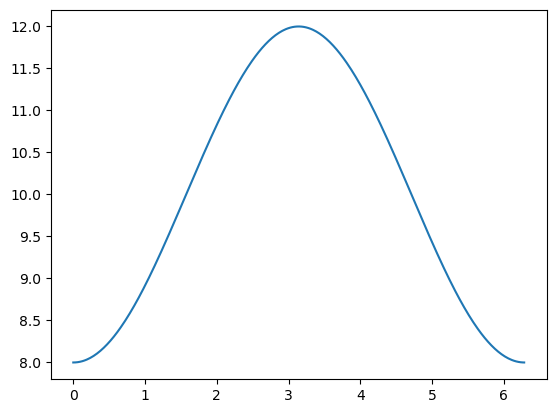

In [17]:
t_grid_A_test = torch.linspace(0.,2*torch.pi,400).view(-1,1)
sol_cluster_A.to('cpu')
sol = sol_cluster_A(t_grid_A_test,torch.full( t_grid_A_test.shape , 8.) )
plt.plot(t_grid_A_test.detach().numpy() , sol.detach().numpy())
plt.show

In [10]:
#save local model A
torch.save(sol_cluster_A, Path(trained_models_address , 'local_A0.pt'))